# Název

## Setup

In [39]:
from protokol import *

In [40]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (4*1.5,2.5*1.5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams["text.latex.preamble"] = r"""
\usepackage[decimalsymbol=comma]{siunitx}
"""

## Úkol 1

### Data

In [54]:
tycka = {
    "l": 0.24,
    "m": 0.0566,
    "d": 6e-3,
    "J": 2.72e-4
}

In [55]:
l = uf(1.33, 0.01)
print(f"l = {l} m")

l = 1.330+/-0.010 m


In [168]:
d_velka = arr([
    40.7,
    40.0,
    40.4,
    40.6,
    40.5
]) * 1e-2
d_mala = arr([
    20.7,
    20.4,
    20.5,
    20.7,
    20.5
]) * 1e-2
r_velka = eval_mean(d_velka, 0.1e-2, 0.5)
r_mala = eval_mean(d_mala, 0.1e-2, 0.5)
print(f"r_velka = {r_velka} m")
print(f"r_mala = {r_mala} m")
print(d_mala*1e3/2)

r_velka = 0.2022+/-0.0008 m
r_mala = 0.1028+/-0.0006 m
[ 103.5  102.   102.5  103.5  102.5]


In [71]:
df = pd.DataFrame()
df["I"] = sp.arange(0, 4.5, 0.5)
df["V5"] = [
    13,
    12,
    11,
    10.1,
    9,
    8,
    7.3,
    6.5,
    5.3
]
df["V10"] = [
    13,
    11,
    9,
    7.2,
    5.3,
    3.4,
    1.7,
    -0.3,
    -2.2
]
df["M5"] = [
    12.7,
    10.8,
    9.1,
    7.2,
    5.5,
    3.5,
    1.8,
    0.1,
    -1.7
]
df["M10"] = [
    12.5,
    9,
    5.2,
    1.8,
    -2,
    -5.4,
    -9.1,
    -12.9,
    -16.6
]

In [72]:
for c in "V5 V10 M5 M10".split():
    df[c] = df[c] * 1e-2
    df[f"x_{c}"] = df[c][0] - df[c]
    df[f"x_{c}"] = df[f"x_{c}"].apply(lambda h: uf(h, 0.005))
    df[f"a_{c}"] = df[f"x_{c}"].values / (2*l)

In [73]:
df

,I,V5,V10,M5,M10,x_V5,a_V5,x_V10,a_V10,x_M5,a_M5,x_M10,a_M10
0,0.0,0.130,0.130,0.127,0.125,0.000+/-0.005,0.0000+/-0.0019,0.000+/-0.005,0.0000+/-0.0019,0.000+/-0.005,0.0000+/-0.0019,0.000+/-0.005,0.0000+/-0.0019
1,0.5,0.120,0.110,0.108,0.090,0.010+/-0.005,0.0038+/-0.0019,0.020+/-0.005,0.0075+/-0.0019,0.019+/-0.005,0.0071+/-0.0019,0.035+/-0.005,0.0132+/-0.0019
2,1.0,0.110,0.090,0.091,0.052,0.020+/-0.005,0.0075+/-0.0019,0.040+/-0.005,0.0150+/-0.0019,0.036+/-0.005,0.0135+/-0.0019,0.073+/-0.005,0.0274+/-0.0019
3,1.5,0.101,0.072,0.072,0.018,0.029+/-0.005,0.0109+/-0.0019,0.058+/-0.005,0.0218+/-0.0019,0.055+/-0.005,0.0207+/-0.0019,0.107+/-0.005,0.0402+/-0.0019
4,2.0,0.090,0.053,0.055,-0.020,0.040+/-0.005,0.0150+/-0.0019,0.077+/-0.005,0.0289+/-0.0019,0.072+/-0.005,0.0271+/-0.0019,0.145+/-0.005,0.0545+/-0.0019
5,2.5,0.080,0.034,0.035,-0.054,0.050+/-0.005,0.0188+/-0.0019,0.096+/-0.005,0.0361+/-0.0019,0.092+/-0.005,0.0346+/-0.0019,0.179+/-0.005,0.0673+/-0.0019
6,3.0,0.073,0.017,0.018,-0.091,0.057+/-0.005,0.0214+/-0.0019,0.113+/-0.005,0.0425+/-0.0019,0.109+/-0.005,0.0410+/-0.0019,0.216+/-0.005,0.0812+/-0.0020
7,3.5,0.065,-0.003,0.001,-0.129,0.065+/-0.005,0.0244+/-0.0019,0.133+/-0.005,0.0500+/-0.0019,0.126+/-0.005,0.0474+/-0.0019,0.254+/-0.005,0.0955+/-0.0020
8,4.0,0.053,-0.022,-0.017,-0.166,0.077+/-0.005,0.0289+/-0.0019,0.152+/-0.005,0.0571+/-0.0019,0.144+/-0.005,0.0541+/-0.0019,0.291+/-0.005,0.1094+/-0.0021


## Úkol 2

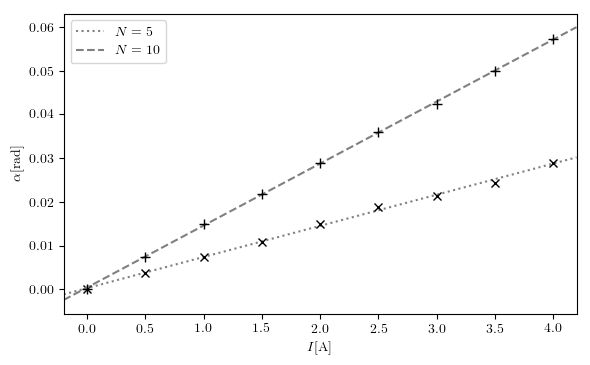

In [174]:
fig = plt.figure()
ax = plt.axes()

fit = FitCurve(f_line, df.I, noms(df.a_V5), sigma=stds(df.a_V5))
S_V5 = fit.params[0]
ax.plot(*fit.curve(overrun=0.05), ":", c="gray", label="$N = 5$")
ax.plot(df.I, noms(df.a_V5), "kx")

# ----- #

fit = FitCurve(f_line, df.I, noms(df.a_V10))
S_V10 = fit.params[0]
ax.plot(*fit.curve(overrun=0.05), "--", c="gray", label="$N = 10$")
ax.plot(df.I, noms(df.a_V10), "k+", ms=7)

ax.legend()
ax.set_xlabel(r"$I[\si{A}]$")
ax.set_ylabel(r"$\alpha [\si{\rad}]$")
ax.margins(x=0)
fig.tight_layout()
fig.savefig("../plot/V.pdf")

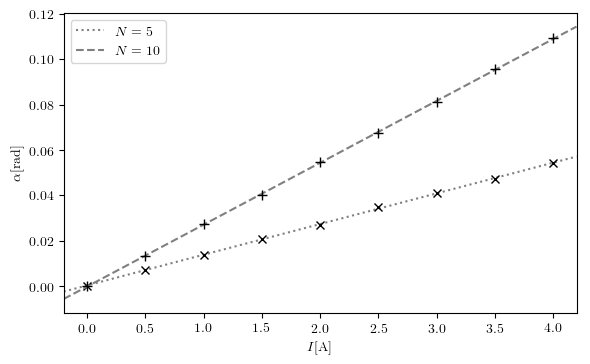

In [177]:
fig = plt.figure()
ax = plt.axes()

fit = FitCurve(f_line, df.I, noms(df.a_M5), sigma=stds(df.a_M5))
S_M5 = fit.params[0]
ax.plot(*fit.curve(overrun=0.05), ":", c="gray", label="$N = 5$")
ax.plot(df.I, noms(df.a_M5), "kx")

# ----- #

fit = FitCurve(f_line, df.I, noms(df.a_M10))
ax.plot(*fit.curve(overrun=0.05), "--", c="gray", label="$N = 10$")
ax.plot(df.I, noms(df.a_M10), "k+", ms=7)
alpha_o_I = fit.params[0]
S_M10 = fit.params[0]

ax.legend()
ax.set_xlabel(r"$I[\si{A}]$")
ax.set_ylabel(r"$\alpha [\si{\rad}]$")
ax.margins(x=0)
fig.tight_layout()
fig.savefig("../plot/M.pdf")

## Úkol 4

In [187]:
T_5_kmitu = arr([
    20.16,
    20.25,
    20.09,
    20.16,
    20.09
])
print(T_5_kmitu / 5)
T_kmitu = eval_mean(T_5_kmitu, 0.2, 1/5)
print(f"T_kmitu = {T_kmitu}")

[ 4.032  4.05   4.018  4.032  4.018]
T_kmitu = 4.03+/-0.04


In [190]:
D = (4 * sp.pi**2 * tycka["J"]) / T_kmitu**2
print(f"{D:eL}")

\left(6.61 \pm 0.13\right) \times 10^{-4}


## Úkol 5

In [191]:
p = 2 * r_mala * D * alpha_o_I / 10

In [195]:
print(f"{p:eL}")

\left(3.71 \pm 0.08\right) \times 10^{-7}


In [193]:
m = p / (4e-7*sp.pi)

In [199]:
print(f"{tycka['J']}")

0.000272


In [185]:
print(f"{S_V5*1e2:L}")

0.712 \pm 0.012
